In [1]:
# Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results
import numpy as np
from scipy import stats

# Sample data
sample = [48, 52, 47, 53, 49, 50, 51, 52, 48, 50]
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # Sample standard deviation
n = len(sample)

# Population parameters
population_mean = 50
alpha = 0.05  # Significance level

# Calculate Z-score
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Calculate p-value for two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Output results
print("Sample Mean:", sample_mean)
print("Z-score:", z_score)
print("P-value:", p_value)

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


Sample Mean: 50.0
Z-score: 0.0
P-value: 1.0
Fail to reject the null hypothesis: No significant difference.


In [2]:
#2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python
import numpy as np
from scipy import stats

# Simulate random sample data from a normal distribution
np.random.seed(42)  # For reproducibility
population_mean = 100
population_std_dev = 15
sample_size = 50

# Generate random sample (assumed from the same population)
sample = np.random.normal(loc=105, scale=15, size=sample_size)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# Hypothesis Testing
# H0: sample mean = population mean (no difference)
# H1: sample mean ≠ population mean (two-tailed test)
alpha = 0.05

# Calculate Z-score
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Calculate two-tailed P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Output
print("Sample Mean:", round(sample_mean, 2))
print("Sample Standard Deviation:", round(sample_std, 2))
print("Z-score:", round(z_score, 3))
print("P-value:", round(p_value, 4))

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference found.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


Sample Mean: 101.62
Sample Standard Deviation: 14.01
Z-score: 0.817
P-value: 0.414
Fail to reject the null hypothesis: No significant difference.


In [3]:
# 3 Implement a one-sample Z-test using Python to compare the sample mean with the population mean
import numpy as np
from scipy import stats

# Simulate random sample data
np.random.seed(42)
sample_size = 40
population_mean = 100
population_std_dev = 15  # Known population standard deviation
sample = np.random.normal(loc=104, scale=15, size=sample_size)

# Calculate sample statistics
sample_mean = np.mean(sample)

# Z-test (one-tailed: H₁: sample mean > population mean)
z_score = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))
p_value = 1 - stats.norm.cdf(z_score)  # One-tailed (greater than test)

# Output results
print("Sample Mean:", round(sample_mean, 2))
print("Z-score:", round(z_score, 3))
print("P-value:", round(p_value, 4))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sample mean is significantly greater than population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


Sample Mean: 100.72
Z-score: 0.304
P-value: 0.3807
Fail to reject the null hypothesis: No significant difference.


Sample Mean: 100.62
Z-score: 0.291
P-value: 0.7708
Fail to reject the null hypothesis: No significant difference.


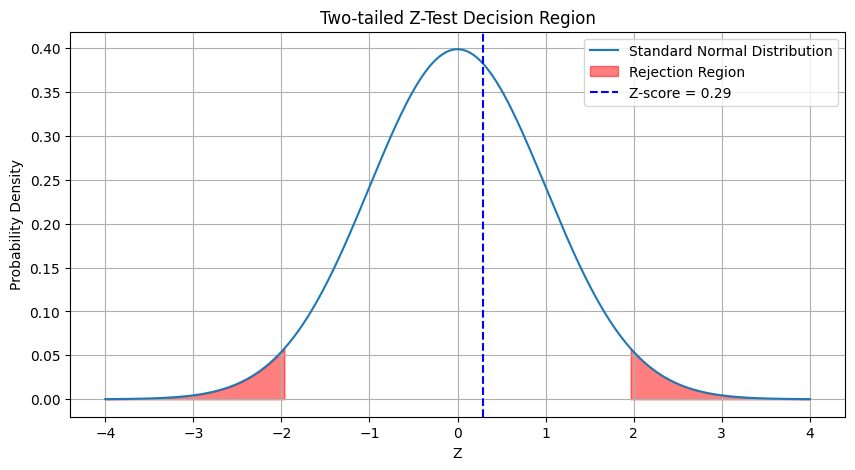

In [4]:
#4 Perform a two-tailed Z-test using Python and visualize the decision region on a plot
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed and simulate sample
np.random.seed(42)
sample_size = 50
population_mean = 100
population_std_dev = 15  # known
sample = np.random.normal(loc=104, scale=15, size=sample_size)

# Sample statistics
sample_mean = np.mean(sample)

# Z-test calculation
z_score = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed

# Output
print("Sample Mean:", round(sample_mean, 2))
print("Z-score:", round(z_score, 3))
print("P-value:", round(p_value, 4))

# Hypothesis decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference found.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Plotting the decision region
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

z_critical = stats.norm.ppf(1 - alpha/2)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Standard Normal Distribution')

# Fill rejection regions
plt.fill_between(x, y, 0, where=(x <= -z_critical), color='red', alpha=0.5, label='Rejection Region')
plt.fill_between(x, y, 0, where=(x >= z_critical), color='red', alpha=0.5)

# Draw Z-score
plt.axvline(z_score, color='blue', linestyle='--', label=f'Z-score = {z_score:.2f}')

# Labels
plt.title('Two-tailed Z-Test Decision Region')
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
#5 Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_errors(mu0, mu1, sigma, n, alpha=0.05):
    se = sigma / np.sqrt(n)
    x = np.linspace(mu0 - 4*se, mu1 + 4*se, 1000)

    # Distributions
    h0 = norm.pdf(x, mu0, se)
    h1 = norm.pdf(x, mu1, se)

    # Critical values
    z = norm.ppf(1 - alpha/2)
    low = mu0 - z * se
    high = mu0 + z * se

    # Type II error
    beta = norm.cdf(high, mu1, se) - norm.cdf(low, mu1, se)

    # Plot
    plt.plot(x, h0, label="H₀", color='blue')
    plt.plot(x, h1, label="H₁", color='green')
    plt.fill_between(x, 0, h0, where=((x < low) | (x > high)), color='red', alpha=0.3, label="Type I Error (α)")
    plt.fill_between(x, 0, h1, where=((x > low) & (x < high)), color='orange', alpha=0.3, label="Type II Error (β)")

    plt.title("Type I and Type II Errors")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"α (Type I Error): {alpha}")
    print(f"β (Type II Error): {beta:.4f}")
    print(f"Power (1 - β): {1 - beta:.4f}")

    plot_errors(mu0=100, mu1=105, sigma=15, n=50)



In [10]:
# Write a Python program to perform an independent T-test and interpret the results?
import numpy as np
from scipy.stats import ttest_ind

# Simulate two independent samples
np.random.seed(42)
group1 = np.random.normal(loc=100, scale=10, size=30)  # Group 1: Mean = 100
group2 = np.random.normal(loc=105, scale=10, size=30)  # Group 2: Mean = 105

# Perform Independent T-test (equal variance assumed by default)
t_stat, p_value = ttest_ind(group1, group2)

# Output
print("Group 1 Mean:", round(np.mean(group1), 2))
print("Group 2 Mean:", round(np.mean(group2), 2))
print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between means.")


Group 1 Mean: 98.12
Group 2 Mean: 103.79
T-statistic: -2.398
P-value: 0.0197
Reject the null hypothesis: Means are significantly different.


Before Mean: 98.12
After Mean: 102.51
T-statistic: -5.17
P-value: 0.0
Reject the null hypothesis: There is a significant difference.


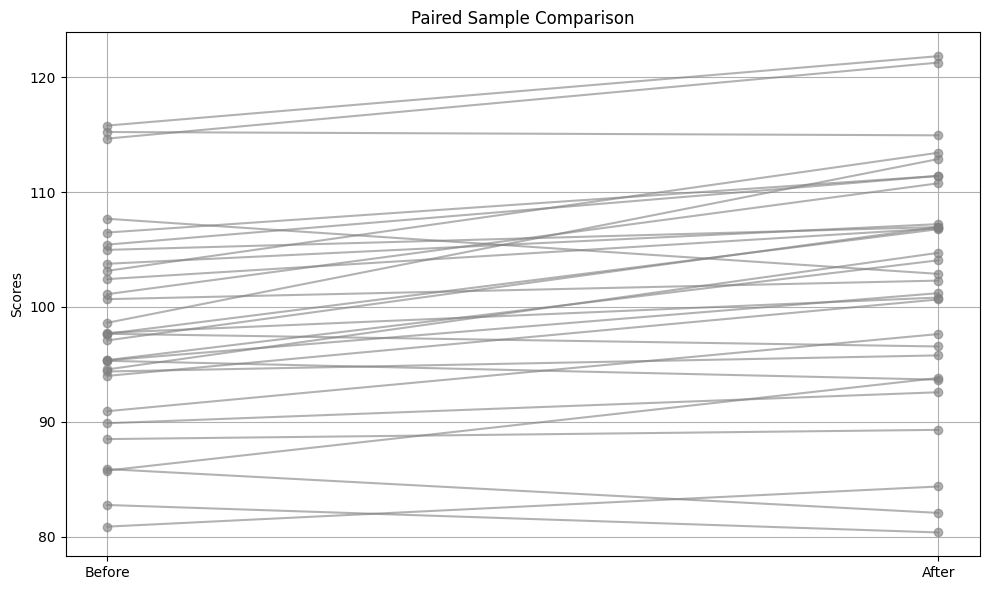

In [11]:
#7 Perform a paired sample T-test using Python and visualize the comparison results
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Simulate paired sample data
np.random.seed(42)
before = np.random.normal(loc=100, scale=10, size=30)
after = before + np.random.normal(loc=5, scale=5, size=30)  # Slight increase

# Paired T-test
t_stat, p_value = ttest_rel(before, after)

# Output results
print("Before Mean:", round(np.mean(before), 2))
print("After Mean:", round(np.mean(after), 2))
print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Visualization
plt.figure(figsize=(10, 6))
for i in range(len(before)):
    plt.plot([1, 2], [before[i], after[i]], marker='o', color='gray', alpha=0.6)

plt.xticks([1, 2], ['Before', 'After'])
plt.title("Paired Sample Comparison")
plt.ylabel("Scores")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
#8 @ Simulate data and perform both Z-test and T-test, then compare the results using Python
import numpy as np
from scipy.stats import norm, ttest_1samp
import math

# Simulate data
np.random.seed(42)
sample = np.random.normal(loc=102, scale=15, size=30)  # sample mean ≠ population mean

# Known population parameters (for Z-test)
pop_mean = 100
pop_std = 15  # assumed known for Z-test

# Z-test
sample_mean = np.mean(sample)
sample_size = len(sample)
z_stat = (sample_mean - pop_mean) / (pop_std / math.sqrt(sample_size))
z_p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# T-test (population std unknown)
t_stat, t_p_value = ttest_1samp(sample, pop_mean)

# Results
print(f"Sample Mean: {round(sample_mean, 2)}")
print("=== Z-Test ===")
print(f"Z-statistic: {round(z_stat, 3)}")
print(f"P-value: {round(z_p_value, 4)}")

print("\n=== T-Test ===")
print(f"T-statistic: {round(t_stat, 3)}")
print(f"P-value: {round(t_p_value, 4)}")

# Interpretation
alpha = 0.05
print("\n=== Interpretation ===")
if z_p_value < alpha:
    print("Z-test: Reject H₀ (significant difference)")
else:
    print("Z-test: Fail to reject H₀")

if t_p_value < alpha:
    print("T-test: Reject H₀ (significant difference)")
else:
    print("T-test: Fail to reject H₀")


Sample Mean: 99.18
=== Z-Test ===
Z-statistic: -0.3
P-value: 0.764

=== T-Test ===
T-statistic: -0.334
P-value: 0.7411

=== Interpretation ===
Z-test: Fail to reject H₀
T-test: Fail to reject H₀


In [13]:
#9 Write a Python function to calculate the confidence interval for a sample mean and explain its significance
import numpy as np
import scipy.stats as stats

def calculate_confidence_interval(data, confidence_level=0.95):
    """
    Calculate the confidence interval for a sample mean.

    Parameters:
    - data: Sample data (list or numpy array)
    - confidence_level: Desired confidence level (default is 95%)

    Returns:
    - (lower_bound, upper_bound): The confidence interval
    """
    # Sample statistics
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Sample standard deviation
    sample_size = len(data)

    # Confidence level and corresponding Z or T value
    alpha = 1 - confidence_level
    t_value = stats.t.ppf(1 - alpha/2, df=sample_size-1)  # T-distribution (for unknown std)

    # Margin of error
    margin_of_error = t_value * (sample_std / np.sqrt(sample_size))

    # Confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return lower_bound, upper_bound

# Example Usage
data = np.random.normal(loc=100, scale=15, size=30)  # Sample data
lower, upper = calculate_confidence_interval(data)
print(f"Confidence Interval: ({round(lower, 2)}, {round(upper, 2)})")


Confidence Interval: (92.97, 103.4)


In [14]:
#10 Write a Python program to calculate the margin of error for a given confidence level using sample data
import numpy as np
from scipy.stats import t

def calculate_margin_of_error(data, confidence_level=0.95):
    """
    Calculate the margin of error for the sample mean.

    Parameters:
    - data: List or array of sample values
    - confidence_level: Desired confidence level (e.g., 0.95 for 95%)

    Returns:
    - margin_of_error: The calculated margin of error
    """
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)

    # Degrees of freedom
    df = n - 1

    # T-score for the given confidence level
    t_score = t.ppf(1 - (1 - confidence_level) / 2, df)

    # Margin of error
    moe = t_score * (sample_std / np.sqrt(n))

    return round(moe, 4)

# Example usage
sample_data = np.random.normal(loc=50, scale=10, size=40)
moe = calculate_margin_of_error(sample_data, confidence_level=0.95)
print(f"Margin of Error (95% confidence): ±{moe}")


Margin of Error (95% confidence): ±2.9225


In [27]:
#11 D Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process
def bayesian_inference(prior_H, likelihood_E_given_H, likelihood_E_given_not_H):
    """
    Apply Bayes' Theorem to compute posterior probability.

    Parameters:
    - prior_H: Prior probability of hypothesis H (P(H))
    - likelihood_E_given_H: Likelihood of evidence given H is true (P(E|H))
    - likelihood_E_given_not_H: Likelihood of evidence given H is false (P(E|¬H))

    Returns:
    - posterior_H: Updated probability of hypothesis given evidence (P(H|E))
    """
    # Prior probability of not H
    prior_not_H = 1 - prior_H

    # Total probability of evidence
    P_E = (likelihood_E_given_H * prior_H) + (likelihood_E_given_not_H * prior_not_H)

    # Posterior probability using Bayes' Theorem
    posterior_H = (likelihood_E_given_H * prior_H) / P_E

    return round(posterior_H, 4)

# Example: Medical test
# H: Patient has the disease
# E: Test comes back positive
prior = 0.01  # 1% prior probability of disease
likelihood_E_given_H = 0.99   # 99% true positive rate
likelihood_E_given_not_H = 0.05  # 5% false positive rate

posterior = bayesian_inference(prior, likelihood_E_given_H, likelihood_E_given_not_H)
print(f"Posterior Probability (Patient has disease | Positive test): {posterior}")


Posterior Probability (Patient has disease | Positive test): 0.1667


In [28]:
#12 Perform a Chi-square test for independence between two categorical variables in Python
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Simulate data: survey of people by gender and preference
data = {
    'Likes Tea': [30, 10],     # [Males, Females]
    'Likes Coffee': [20, 40]
}

# Create a contingency table (2x2)
contingency_table = pd.DataFrame(data, index=['Male', 'Female'])

# Display the table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print(f"\nChi-square Statistic = {chi2:.3f}")
print(f"P-value = {p:.4f}")
print(f"Degrees of Freedom = {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpretation
alpha = 0.05
if p < alpha:
    print("\nConclusion: Reject the null hypothesis — there IS a significant relationship.")
else:
    print("\nConclusion: Fail to reject the null hypothesis — NO significant relationship.")


Contingency Table:
        Likes Tea  Likes Coffee
Male           30            20
Female         10            40

Chi-square Statistic = 15.042
P-value = 0.0001
Degrees of Freedom = 1

Expected Frequencies:
        Likes Tea  Likes Coffee
Male         20.0          30.0
Female       20.0          30.0

Conclusion: Reject the null hypothesis — there IS a significant relationship.


In [29]:
#13Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Observed data (contingency table)
data = {
    'A': [50, 30],
    'B': [20, 40]
}
observed = pd.DataFrame(data, index=['Group1', 'Group2'])

# Display observed frequencies
print("Observed Frequencies:")
print(observed)

# Calculate expected frequencies
chi2, p, dof, expected = chi2_contingency(observed)

# Convert expected array to DataFrame
expected_df = pd.DataFrame(expected, index=observed.index, columns=observed.columns)

# Output
print("\nExpected Frequencies:")
print(expected_df.round(2))


Observed Frequencies:
         A   B
Group1  50  20
Group2  30  40

Expected Frequencies:
           A     B
Group1  40.0  30.0
Group2  40.0  30.0


In [30]:
#14 Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution
import numpy as np
from scipy.stats import chisquare

# Observed frequencies (e.g., fruit choices)
observed = np.array([20, 30, 25, 25])

# Expected frequencies (assuming uniform distribution)
expected = np.array([25, 25, 25, 25])  # Equal preference

# Perform chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Output results
print("Chi-Square Goodness-of-Fit Test")
print(f"Chi-square statistic: {round(chi2_stat, 3)}")
print(f"P-value: {round(p_value, 4)}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H₀ — the data does not fit the expected distribution.")
else:
    print("Conclusion: Fail to reject H₀ — the data fits the expected distribution.")


Chi-Square Goodness-of-Fit Test
Chi-square statistic: 2.0
P-value: 0.5724
Conclusion: Fail to reject H₀ — the data fits the expected distribution.


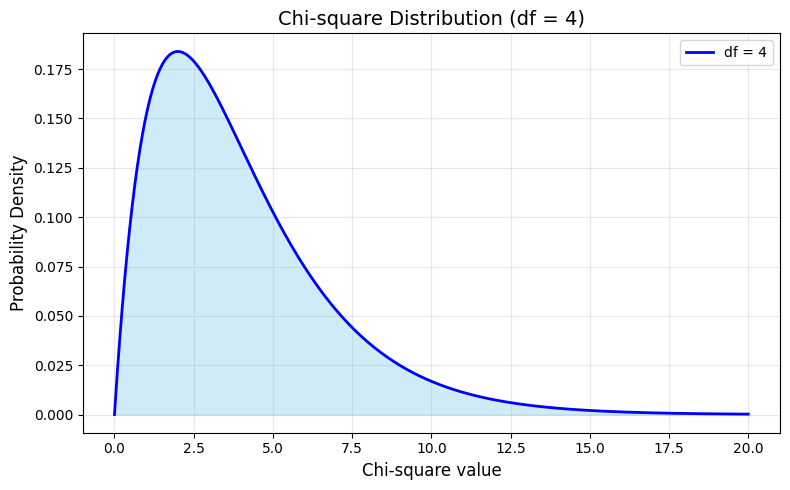

In [31]:
#15 Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parameters
df = 4  # degrees of freedom
x = np.linspace(0, 20, 500)
y = chi2.pdf(x, df)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f'df = {df}', color='blue', linewidth=2)
plt.fill_between(x, y, color='skyblue', alpha=0.4)

plt.title('Chi-square Distribution (df = 4)', fontsize=14)
plt.xlabel('Chi-square value', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
#16 Implement an F-test using Python to compare the variances of two random samples
import numpy as np
from scipy.stats import f

def f_test(sample1, sample2, alpha=0.05):
    # Sample sizes
    n1 = len(sample1)
    n2 = len(sample2)

    # Sample variances (unbiased)
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)

    # Determine which variance is larger for correct F-ratio
    if var1 > var2:
        f_stat = var1 / var2
        df1, df2 = n1 - 1, n2 - 1
    else:
        f_stat = var2 / var1
        df1, df2 = n2 - 1, n1 - 1

    # Critical value at given alpha (two-tailed)
    critical_value = f.ppf(1 - alpha / 2, df1, df2)
    p_value = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))

    # Result summary
    print(f"Sample 1 Variance: {round(var1, 3)}")
    print(f"Sample 2 Variance: {round(var2, 3)}")
    print(f"F-statistic: {round(f_stat, 3)}")
    print(f"P-value: {round(p_value, 4)}")

    if p_value < alpha:
        print("Conclusion: Reject H₀ — Variances are significantly different.")
    else:
        print("Conclusion: Fail to reject H₀ — No significant difference in variances.")

# Example: Generate two random samples
np.random.seed(42)
sample_a = np.random.normal(loc=50, scale=5, size=30)
sample_b = np.random.normal(loc=50, scale=8, size=30)

# Run F-test
f_test(sample_a, sample_b)


Sample 1 Variance: 20.25
Sample 2 Variance: 55.485
F-statistic: 2.74
P-value: 0.0084
Conclusion: Reject H₀ — Variances are significantly different.


In [33]:
#17 Write a Python program to perform an ANOVA test to compare means between multiple groups and  interpret the resultsD
import numpy as np
from scipy.stats import f_oneway

# Simulated data for 3 groups (e.g., test scores from 3 teaching methods)
group1 = [85, 88, 90, 93, 87]
group2 = [78, 74, 80, 79, 77]
group3 = [92, 95, 91, 89, 94]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)

# Display results
print("One-Way ANOVA Test")
print(f"F-statistic: {round(f_statistic, 3)}")
print(f"P-value: {round(p_value, 4)}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H₀ — At least one group mean is significantly different.")
else:
    print("Conclusion: Fail to reject H₀ — No significant difference among group means.")


One-Way ANOVA Test
F-statistic: 42.749
P-value: 0.0
Conclusion: Reject H₀ — At least one group mean is significantly different.


One-Way ANOVA Test
F-statistic: 40.976
P-value: 0.0
Conclusion: Reject H₀ — At least one group mean is significantly different.


<ipython-input-34-06425ef2a8d4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=df, palette='Set2')


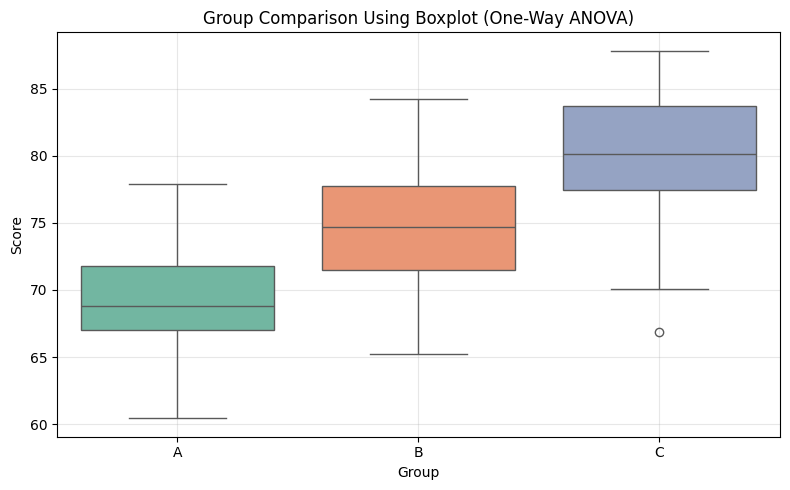

In [34]:
#18 Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Simulate data for 3 groups (e.g., scores under 3 training programs)
np.random.seed(42)
group_A = np.random.normal(loc=70, scale=5, size=30)
group_B = np.random.normal(loc=75, scale=5, size=30)
group_C = np.random.normal(loc=80, scale=5, size=30)

# Combine data into a DataFrame for plotting
df = pd.DataFrame({
    'Score': np.concatenate([group_A, group_B, group_C]),
    'Group': ['A']*30 + ['B']*30 + ['C']*30
})

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group_A, group_B, group_C)

# Print results
print("One-Way ANOVA Test")
print(f"F-statistic: {round(f_stat, 3)}")
print(f"P-value: {round(p_value, 4)}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H₀ — At least one group mean is significantly different.")
else:
    print("Conclusion: Fail to reject H₀ — No significant difference among group means.")

# Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Group', y='Score', data=df, palette='Set2')
plt.title("Group Comparison Using Boxplot (One-Way ANOVA)")
plt.ylabel("Score")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


=== Checking ANOVA Assumptions ===

1. Normality (Shapiro-Wilk Test):
  Group A: p = 0.6868 -> Pass
  Group B: p = 0.9130 -> Pass
  Group C: p = 0.3654 -> Pass

2. Equal Variance (Levene’s Test):
  Levene’s test p-value = 0.8627 -> Pass

3. Residual Plot (Check for Independence):


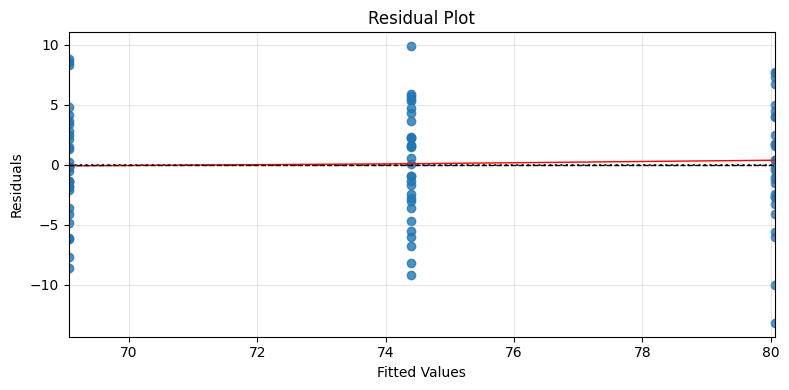

In [36]:
#19 D Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVAD
import numpy as np
import pandas as pd
from scipy.stats import shapiro, levene
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

def check_anova_assumptions(data, group_col, value_col):
    """
    data: pandas DataFrame
    group_col: column name for group/category
    value_col: column name for numerical values
    """

    print("=== Checking ANOVA Assumptions ===")

    # 1. Normality Test (Shapiro-Wilk)
    print("\n1. Normality (Shapiro-Wilk Test):")
    for group in data[group_col].unique():
        stat, p = shapiro(data[data[group_col] == group][value_col])
        print(f"  Group {group}: p = {p:.4f} -> {'Pass' if p > 0.05 else 'Fail'}")

    # 2. Homogeneity of Variance (Levene’s Test)
    print("\n2. Equal Variance (Levene’s Test):")
    groups = [data[data[group_col] == g][value_col] for g in data[group_col].unique()]
    stat, p = levene(*groups)
    print(f"  Levene’s test p-value = {p:.4f} -> {'Pass' if p > 0.05 else 'Fail'}")

    # 3. Residual Plot (for Independence & Homoscedasticity visual check)
    print("\n3. Residual Plot (Check for Independence):")
    model = ols(f'{value_col} ~ C({group_col})', data=data).fit()
    residuals = model.resid
    fitted = model.fittedvalues

    plt.figure(figsize=(8, 4))
    sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.axhline(0, linestyle='--', color='black', linewidth=1)
    plt.title("Residual Plot")
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example
import numpy as np
import pandas as pd

np.random.seed(42)
df = pd.DataFrame({
    'Group': ['A']*30 + ['B']*30 + ['C']*30,
    'Score': np.concatenate([
        np.random.normal(70, 5, 30),
        np.random.normal(75, 5, 30),
        np.random.normal(80, 5, 30)
    ])
})

check_anova_assumptions(df, group_col='Group', value_col='Score')


Two-Way ANOVA Results:
                            sum_sq    df          F        PR(>F)
C(Factor1)             1159.130250   2.0  26.072266  1.189586e-08
C(Factor2)                0.165442   1.0   0.007443  9.315707e-01
C(Factor1):C(Factor2)     6.209540   2.0   0.139671  8.699575e-01
Residual               1200.375805  54.0        NaN           NaN
Conclusion: Fail to reject H₀ — No significant interaction between Factor1 and Factor2.


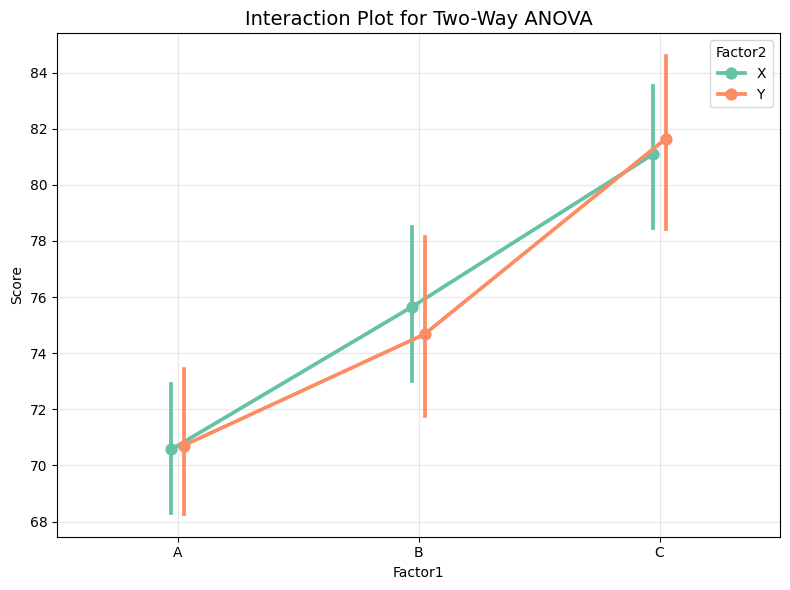

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Simulating data for two-way ANOVA
np.random.seed(42)
factor1 = ['A', 'B', 'C']
factor2 = ['X', 'Y']

# Create a full factorial design
factor1_levels = len(factor1)
factor2_levels = len(factor2)

# Each combination of Factor1 and Factor2
combinations = [(f1, f2) for f1 in factor1 for f2 in factor2]

# Generate scores for each combination
scores = []
for f1, f2 in combinations:
    scores.extend(np.random.normal(loc=70 + factor1.index(f1)*5 + factor2.index(f2)*3, scale=5, size=10))

# Create DataFrame
df = pd.DataFrame({
    'Factor1': np.repeat(factor1, factor2_levels * 10),
    'Factor2': np.tile(factor2, factor1_levels * 10),
    'Score': scores
})

# Perform two-way ANOVA with interaction between Factor1 and Factor2
model = ols('Score ~ C(Factor1) * C(Factor2)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print("Two-Way ANOVA Results:")
print(anova_table)

# Interpretation of results
alpha = 0.05
if anova_table['PR(>F)']['C(Factor1):C(Factor2)'] < alpha:
    print("Conclusion: Reject H₀ — There is a significant interaction between Factor1 and Factor2.")
else:
    print("Conclusion: Fail to reject H₀ — No significant interaction between Factor1 and Factor2.")

# Visualization of interaction effect
plt.figure(figsize=(8, 6))
sns.pointplot(x='Factor1', y='Score', hue='Factor2', data=df, dodge=True, markers='o', linestyles='-', palette='Set2')
plt.title('Interaction Plot for Two-Way ANOVA', fontsize=14)
plt.xlabel('Factor1')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


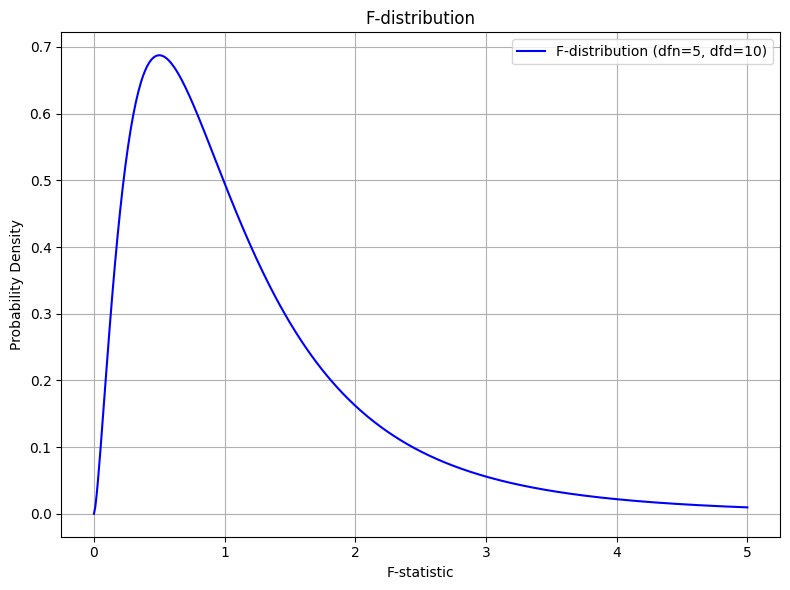

In [44]:
#21  Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parameters for F-distribution
dfn = 5  # Degrees of freedom for the numerator
dfd = 10  # Degrees of freedom for the denominator

# Range for the x-axis (values of the F-statistic)
x = np.linspace(0, 5, 500)

# Calculate the PDF of the F-distribution
y = f.pdf(x, dfn, dfd)

# Plot the F-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'F-distribution (dfn={dfn}, dfd={dfd})', color='blue')
plt.title('F-distribution')
plt.xlabel('F-statistic')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


One-Way ANOVA Results:
F-statistic: 12.2095
P-value: 0.0000
Conclusion: Reject H₀ — There is a significant difference between the group means.


<ipython-input-45-9cba5b6de525>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=data, palette='Set2')


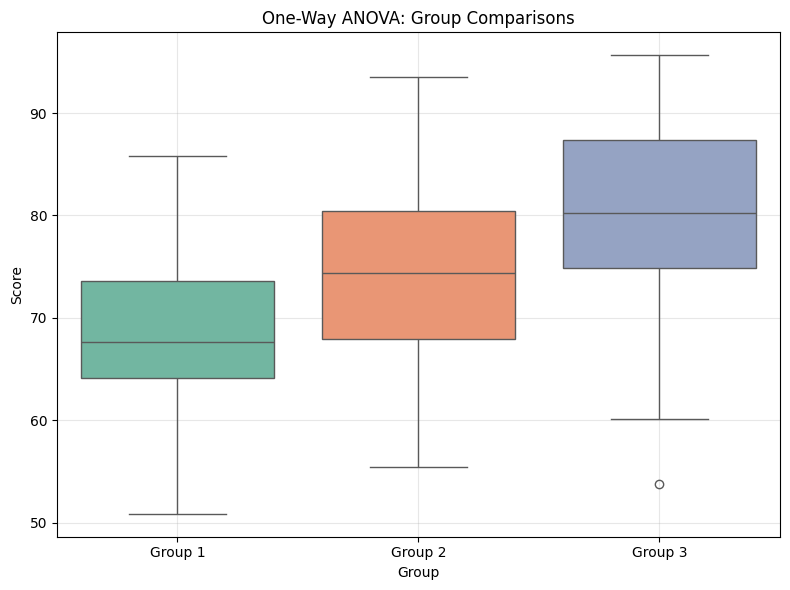

In [45]:
#22 D Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group meansD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Simulate data for three groups
np.random.seed(42)
group1 = np.random.normal(70, 10, 30)
group2 = np.random.normal(75, 10, 30)
group3 = np.random.normal(80, 10, 30)

# Combine data into a DataFrame
data = pd.DataFrame({
    'Score': np.concatenate([group1, group2, group3]),
    'Group': ['Group 1']*30 + ['Group 2']*30 + ['Group 3']*30
})

# Perform One-Way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)

# Print the ANOVA results
print("One-Way ANOVA Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of results
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H₀ — There is a significant difference between the group means.")
else:
    print("Conclusion: Fail to reject H₀ — There is no significant difference between the group means.")

# Visualization: Boxplot to compare group means
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Score', data=data, palette='Set2')
plt.title('One-Way ANOVA: Group Comparisons')
plt.xlabel('Group')
plt.ylabel('Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Sample Mean: 48.96
Sample Standard Deviation: 9.08
Standard Error: 0.91
T-statistic: -1.1435
P-value: 0.2556
Conclusion: Fail to reject H₀ — There is no significant difference between the sample mean and the population mean.


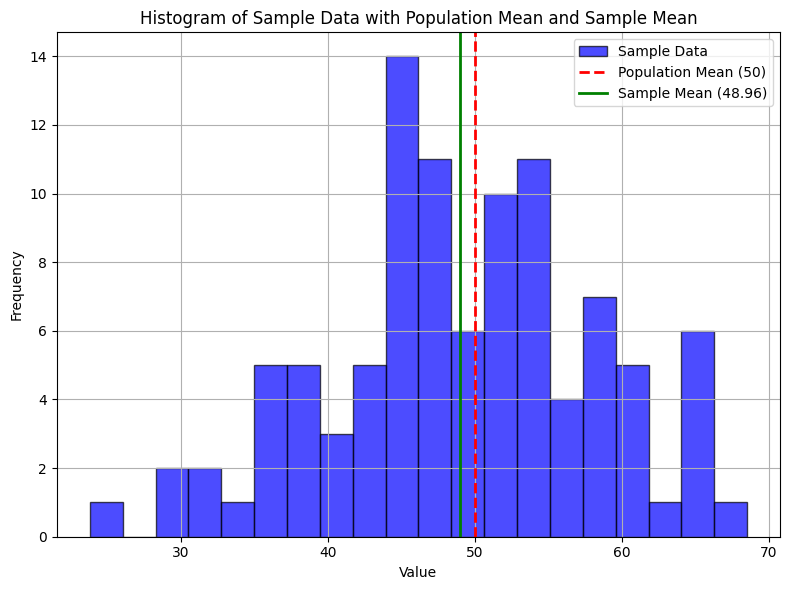

In [46]:
#23 Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the meansD
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulate random data from a normal distribution
np.random.seed(42)
population_mean = 50  # Known population mean
sample_size = 100  # Size of the sample
sample_data = np.random.normal(loc=population_mean, scale=10, size=sample_size)

# Calculate the sample mean and standard error
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # Sample standard deviation
std_error = sample_std / np.sqrt(sample_size)

# Perform a one-sample t-test to compare the sample mean with the population mean
t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)

# Print the results of the t-test
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Standard Error: {std_error:.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Conclusion: Reject H₀ — The sample mean is significantly different from the population mean.")
else:
    print("Conclusion: Fail to reject H₀ — There is no significant difference between the sample mean and the population mean.")

# Visualization: Plot the distribution of the sample data and the population mean
plt.figure(figsize=(8, 6))
plt.hist(sample_data, bins=20, alpha=0.7, color='blue', edgecolor='black', label='Sample Data')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label=f'Population Mean ({population_mean})')
plt.axvline(sample_mean, color='green', linestyle='solid', linewidth=2, label=f'Sample Mean ({sample_mean:.2f})')
plt.title('Histogram of Sample Data with Population Mean and Sample Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
#24 Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results
import numpy as np
import scipy.stats as stats

# Simulate sample data
np.random.seed(42)
sample_size = 30  # Sample size
population_variance = 100  # Hypothesized population variance
sample_data = np.random.normal(loc=50, scale=np.sqrt(population_variance), size=sample_size)

# Calculate sample variance
sample_variance = np.var(sample_data, ddof=1)  # Sample variance (ddof=1 for unbiased estimate)

# Perform the Chi-square test
chi_square_statistic = (sample_size - 1) * sample_variance / population_variance

# Degrees of freedom
df = sample_size - 1

# Determine the critical value for a two-tailed test at alpha = 0.05
alpha = 0.05
critical_value_lower = stats.chi2.ppf(alpha / 2, df)
critical_value_upper = stats.chi2.ppf(1 - alpha / 2, df)

# Print results
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Chi-Square Statistic: {chi_square_statistic:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"Critical Value Lower: {critical_value_lower:.4f}")
print(f"Critical Value Upper: {critical_value_upper:.4f}")

# Hypothesis Test Interpretation
if chi_square_statistic < critical_value_lower or chi_square_statistic > critical_value_upper:
    print("Conclusion: Reject H₀ — The population variance is significantly different from the hypothesized value.")
else:
    print("Conclusion: Fail to reject H₀ — The population variance is not significantly different from the hypothesized value.")


Sample Variance: 81.00
Chi-Square Statistic: 23.4903
Degrees of Freedom: 29
Critical Value Lower: 16.0471
Critical Value Upper: 45.7223
Conclusion: Fail to reject H₀ — The population variance is not significantly different from the hypothesized value.


In [48]:
#25 Write a Python script to perform a Z-test for comparing proportions between two datasets or groups
import numpy as np
import scipy.stats as stats

# Simulated data for two groups
# Group 1: 50 successes out of 100 trials
# Group 2: 40 successes out of 100 trials
x1 = 50  # Number of successes in group 1
n1 = 100  # Sample size of group 1

x2 = 40  # Number of successes in group 2
n2 = 100  # Sample size of group 2

# Calculate sample proportions
p1 = x1 / n1
p2 = x2 / n2

# Pooled sample proportion
P = (x1 + x2) / (n1 + n2)

# Z-statistic for comparing proportions
Z = (p1 - p2) / np.sqrt(P * (1 - P) * (1/n1 + 1/n2))

# P-value for two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))  # Two-tailed test

# Print results
print(f"Proportion of Group 1: {p1:.4f}")
print(f"Proportion of Group 2: {p2:.4f}")
print(f"Z-statistic: {Z:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Conclusion: Reject H₀ — The proportions are significantly different.")
else:
    print("Conclusion: Fail to reject H₀ — The proportions are not significantly different.")


Proportion of Group 1: 0.5000
Proportion of Group 2: 0.4000
Z-statistic: 1.4213
P-value: 0.1552
Conclusion: Fail to reject H₀ — The proportions are not significantly different.


Sample Variance of Group 1: 82.48
Sample Variance of Group 2: 363.79
F-statistic: 0.2267
P-value: 0.0000
Conclusion: Reject H₀ — The variances are significantly different.


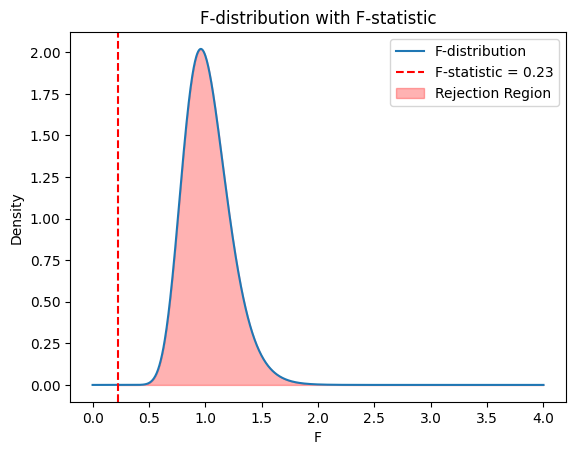

In [49]:
#26 Implement an F-test for comparing the variances of two datasets, then interpret and visualize the resultsD
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulated data for two groups
np.random.seed(42)

# Group 1 (e.g., Dataset 1)
data1 = np.random.normal(loc=50, scale=10, size=100)  # Mean=50, Std=10, Sample size=100

# Group 2 (e.g., Dataset 2)
data2 = np.random.normal(loc=50, scale=20, size=100)  # Mean=50, Std=20, Sample size=100

# Calculate sample variances
s1_squared = np.var(data1, ddof=1)  # Sample variance for Group 1
s2_squared = np.var(data2, ddof=1)  # Sample variance for Group 2

# F-statistic: ratio of variances
F_statistic = s1_squared / s2_squared

# Degrees of freedom
df1 = len(data1) - 1  # Degrees of freedom for Group 1
df2 = len(data2) - 1  # Degrees of freedom for Group 2

# Calculate p-value for two-tailed test (using the F-distribution)
p_value = 2 * min(stats.f.cdf(F_statistic, df1, df2), 1 - stats.f.cdf(F_statistic, df1, df2))

# Print results
print(f"Sample Variance of Group 1: {s1_squared:.2f}")
print(f"Sample Variance of Group 2: {s2_squared:.2f}")
print(f"F-statistic: {F_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Conclusion: Reject H₀ — The variances are significantly different.")
else:
    print("Conclusion: Fail to reject H₀ — The variances are not significantly different.")

# Visualize the F-distribution with the calculated F-statistic
x = np.linspace(0, 4, 1000)
y = stats.f.pdf(x, df1, df2)

plt.plot(x, y, label='F-distribution')
plt.axvline(x=F_statistic, color='r', linestyle='--', label=f'F-statistic = {F_statistic:.2f}')
plt.fill_between(x, y, where=(x >= F_statistic), color='red', alpha=0.3, label='Rejection Region')
plt.title('F-distribution with F-statistic')
plt.xlabel('F')
plt.ylabel('Density')
plt.legend()
plt.show()


Observed Frequencies: [50 30 20]
Expected Frequencies: [33.33333333 33.33333333 33.33333333]
Chi-square Statistic: 14.0000
P-value: 0.0009
Conclusion: Reject H₀ — The observed frequencies do not follow the expected distribution.


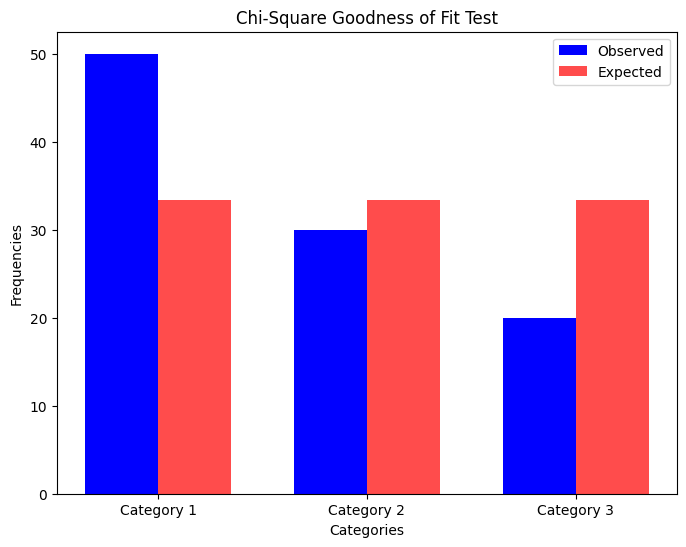

In [50]:
#27 Perform a Chi-square test for goodness of fit with simulated data and analyze the results
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulate observed data (e.g., number of votes in different categories)
observed = np.array([50, 30, 20])  # Observed frequencies for three categories

# Expected frequencies (assuming uniform distribution, each category should have equal frequency)
total_count = sum(observed)
expected = np.array([total_count / len(observed)] * len(observed))

# Perform the Chi-square goodness of fit test
chi2_stat, p_value = stats.chisquare(observed, expected)

# Print the results
print(f"Observed Frequencies: {observed}")
print(f"Expected Frequencies: {expected}")
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Conclusion: Reject H₀ — The observed frequencies do not follow the expected distribution.")
else:
    print("Conclusion: Fail to reject H₀ — The observed frequencies follow the expected distribution.")

# Visualize the observed and expected frequencies
categories = ['Category 1', 'Category 2', 'Category 3']
bar_width = 0.35
index = np.arange(len(observed))

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(index, observed, bar_width, label='Observed', color='b')
bar2 = ax.bar(index + bar_width, expected, bar_width, label='Expected', color='r', alpha=0.7)

ax.set_xlabel('Categories')
ax.set_ylabel('Frequencies')
ax.set_title('Chi-Square Goodness of Fit Test')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.show()
